In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import math
from scipy import spatial
%matplotlib inline

Text(0.5,1,'Ant Path Trace')

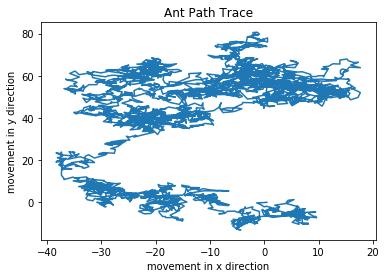

In [3]:
#Question 1A

steps = 60*60
mu = 0
sigma = 1

x = np.random.normal(mu, sigma, steps)
y = np.random.normal(mu, sigma, steps)

x = np.cumsum(x)
y = np.cumsum(y)

plt.plot(x,y)
plt.ylabel('movement in y direction')
plt.xlabel('movement in x direction')
plt.title('Ant Path Trace')

In [4]:
#Question 1B

#1000 trials of return path and the (number of trials that get within 10mm)/1000 is the probability

count = 0
steps = 7200
mu = 0
sigma = 1
trials = 1000

for i in range(trials): #conducts 700 trials
    
    #journey
    x = np.random.normal(mu, sigma, steps)
    y = np.random.normal(mu, sigma, steps)
    x = np.cumsum(x)
    y = np.cumsum(y)
    
    to_food_x = x[0:3599]
    to_food_y = y[0:3599]

    to_home_x = x[3600:7199]
    to_home_y = y[3600:7199]
    
    #distance computation
    nest = [to_food_x[0], to_food_y[0]]
    d = 0
    while (d < 3599):
        distance = spatial.distance.euclidean(nest, [to_home_x[d], to_home_y[d]])
        if (distance <= 10):
            count+=1
            d = 3600 #breaks while loop
        d+=1

percent = round((count/trials * 100), 4)
conclusion = 'In %s trials, about %s percent make it within 10 mm of the nest.' % (trials, percent)
print (conclusion)

In 1000 trials, about 19.6 percent make it within 10 mm of the nest.


In [119]:
#Question 1C

summed = 0
steps = 7200
mu = 0
sigma = 1
trials = 1000

for i in range(trials): 
    
    #journey
    x = np.random.normal(mu, sigma, steps)
    y = np.random.normal(mu, sigma, steps)
    x = np.cumsum(x)
    y = np.cumsum(y)
    
    to_food_x = x[0:3599]
    to_food_y = y[0:3599]

    to_home_x = x[3600:7199]
    to_home_y = y[3600:7199]
    
    #minimum average distance computation
    distance = []
    nest = [to_food_x[0], to_food_y[0]]
    for d in range(3599):
        distance.append(spatial.distance.euclidean(nest, [to_home_x[d], to_home_y[d]]))
    
    summed += min(distance)

average_min_distance = round((summed/trials), 4)

conclusion = 'In %s trials, the closest an ant gets back to the nest on average is: %s mm.' % (trials, average_min_distance)
print (conclusion)

In 1000 trials, the closest an ant gets back to the nest on average is: 46.7854 mm.


Text(0,0.5,'Distance From Nest')

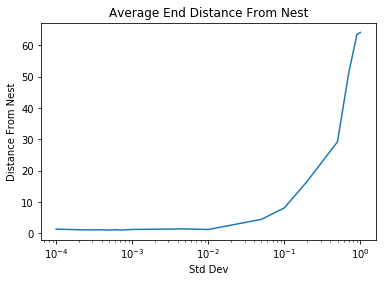

In [6]:
#Question 2: blurry memory

steps = 3600
mu = 0
sigma = 1


def blurry_memory(mu, sigma, steps, std_dev):
    #actual journey
    x = np.random.normal(mu, 1, steps)
    y = np.random.normal(mu, 1, steps)

    #create noisiness, add to actual vector
    x_noisy = x + np.random.normal(mu, std_dev, steps)
    y_noisy = y + np.random.normal(mu, std_dev, steps)

    x = np.cumsum(x)
    y = np.cumsum(y)
    x_noisy = np.cumsum(x_noisy)
    y_noisy = np.cumsum(y_noisy)   

    perceived_vector_back = [(x[3599] - x_noisy[3599]), (y[3599]-y_noisy[3599])]
    nest = [x[0], y[0]]
    distance = spatial.distance.euclidean(nest, perceived_vector_back)
    
    return distance 

def trials(mu, sigma, steps, num_trials, std_dev):
    summed = 0
    for i in range(num_trials):
        summed += blurry_memory(mu, sigma, steps, std_dev)
    
    avg = round((summed/num_trials), 2)
    
    return avg

#various std deviations
std_dev_variation = [1, .9, .7, .5, .3, .2, .1, .05, .01, .005, .001, .0007, .0006, .0005, .0004, .0003, .0002, .0001]
avg_dist = []

for i in (std_dev_variation):
    
    d = trials (mu, sigma, steps, 20, i)
    avg_dist.append(d)
  

plt.plot(std_dev_variation, avg_dist)
plt.xscale("log")
plt.title("Average End Distance From Nest")
plt.xlabel("Std Dev")
plt.ylabel("Distance From Nest")

Text(0.5,1,'Energy Expenditure as a function of Path Integration Quality')

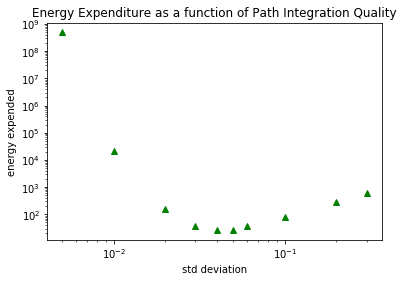

In [19]:
#Question 3A: energy expended

steps = 7200
mu = 0
sigma = 1

def energy_expended(mu, sigma, steps, std_dev):
    distance = blurry_memory(mu, sigma, steps, std_dev)
    energy = (np.exp(.1/std_dev)) + (distance **2)
        
    return energy 

def energy_trials(mu, sigma, steps, num_trials, std_dev):
    summed = 0
    for i in range(num_trials):
        summed += energy_expended(mu, sigma, steps, std_dev)
    
    avg = summed/num_trials
    
    return avg


std_dev_variation = [.3, .2, .1, .06, .05, .04, .03, .02, .01, .005]
avg_energy = []

for i in (std_dev_variation):
    e = energy_trials(mu, sigma, steps, 500, i)
    avg_energy.append(e)

plt.plot(std_dev_variation, avg_energy, 'g^')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('energy expended')
plt.xlabel('std deviation')
plt.title('Energy Expenditure as a function of Path Integration Quality')

In [21]:
#Question 3B: evolutionary significance of the minimum

print (min(avg_energy))

26.232172573887922


The graph above depicts the average energy expenditure for variable S values (standard deviation) in the computation of path integration in ants. How well an organism can compute their original path is proportional to how well they can get back to their nest/food/important area and is thus, proportional to their survivial rate. How well an organism can preserve their energy is also vital to survival. Both factors are evolutionarily important. In this Gaussian model, larger S values correspond to larger margin of error in the organism's path integration. 

What is interesting about this graph is that minimum of the plot occurs between S values of .05 & .04, each with energy expenditure of 27.395 & 26.232, respectively. Larger and smaller S values result in greater energy expenditure since it either takes extra effort to find the nest again if you've computed it wrong (larger S) or takes extra effort to compute it in the first place (smaller S).

Overall, the minimum signifies the ideal S (in a Gaussian model of path integration) in which the animal can expend the least energy in returning to its nest after finding food. However, some things this ideal S did not account for are: different amounts of time spent walking to food, brain capacity, body capacity, and so on).